## 3D surface plot for VAE
Variational autoencoder (VAE) is a popular generative model and has been applied to many different fields. One common routine of these researches is to map a subject (say molecules) to a  space and perform optimization on that. I found illustrating this process is a bit challenging, especially when you want to draw a customized/random 3D surface on a 2D contour. So I wrote this notebook to generate this kind of images. Here you don't need to define a function to polt the 3D surface and contour. You only need to define arrays with indicated pattern and the program will plot it for you. You can also customize image based on your own demands. This is originally made for my group meeting report. Hope it will be helpful for you. Thanks Christian for giving very helpful comments about the code!

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import io


def save_read(array:np.ndarray):
    '''
    Create an image from the array and transfer it to a binary image with bicubic interpolation.
    Then store and read it again to get the intensity of each pixels.
    
    args:
        array: the array to be plotted
    '''
    fig, ax = plt.subplots(1, figsize=(3, 3))
    interp = 'bicubic'
    ax.imshow(array, interpolation=interp,cmap='binary')
    ax.grid(False)
    ax.set_facecolor("none")
    ax.axis("off")
    # save the image to buffer
    with io.BytesIO() as img:
        fig.savefig(img, bbox_inches="tight", pad_inches=0)
        plt.close(fig) # if you delete this, the binary plot will show in the notebook
        img.seek(0) 
        img = mpimg.imread(img)
    pixels = np.array(img[:, :, 0]) 
    x, y = np.meshgrid((np.arange(pixels.shape[1])/pixels.shape[1]), (np.arange(pixels.shape[0])/pixels.shape[0]))
    return(x,y,pixels)


def plot_vae_surface(array_top:np.ndarray,array_bottom:np.ndarray,file_name='plot_3d',save_file=True,top_cmap='viridis',bottom_cmap='coolwarm',z_label=''):
    
    '''
    Plot the 3D surface contour with a 2D contour beneath.
    
    args:
        array_top: the array to be plotted in 3D surface plot
        array_buttom: the array to be plotted in 2D at bottom
        save_file: whether the surface is saved. If true, please give a file name.
        file_name: name of the image to be stored, without'.png'
        top_cmap: colormap of the 3D surface
        bottom_cmap: colormap of the 2D contour
        z_labels: name of the colorbar. If none, the colorbar will not show.
        
    '''
    
    x_top,y_top,z_top = save_read(array_top)
    x_bottom,y_bottom,z_bottom = save_read(array_bottom)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    #Vertical distance between 3D surface and 2D contour could be adjusted with offset
    lines = ax.contourf(x_bottom, y_bottom, z_bottom, 10, offset=-1,cmap=bottom_cmap,alpha = 0.5)
    surface = ax.plot_surface(x_top, y_top, z_top, cmap=top_cmap)
    ax.grid(False)
    ax.set_facecolor("white")
    ax.axis("off")
    ax.set_zlabel('Possibility')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_zlim(-0.7,1)
    if z_label:
        fig.colorbar(surface,shrink=0.5,pad = -0.05,ticks=[],label='Possibility')
    plt.show()
    if save_file:
        fig.savefig(f'{file_name}.png', bbox_inches='tight', pad_inches=0,transparent=True,dpi=1200)

You could generate two random 2D array and use one for 3D surface and one for 2D contour

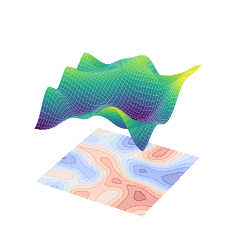

In [47]:
A = np.random.rand(7, 7)
B = np.random.rand(7, 7)
plot_vae_surface(array_top=A,array_bottom=B,save_file=False)

To draw many different 3D surface on same 2D contour, simply apply a loop.

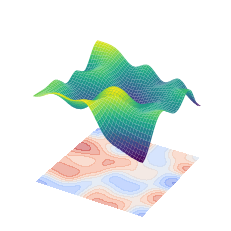

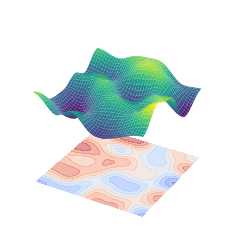

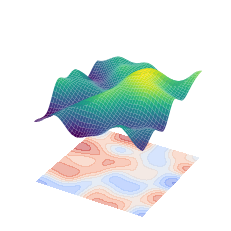

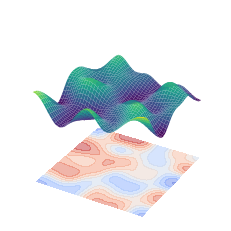

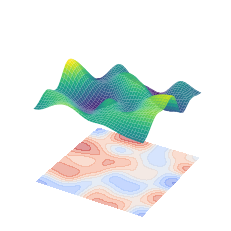

In [44]:
A = np.random.rand(7, 7)
for i in range(5):
    B = np.random.rand(7, 7)
    plot_vae_surface(array_top=B,array_bottom=A,file_name=f'plot_3D_{i+1}')

The shape of the arrays define the 'roughness' of the surface.

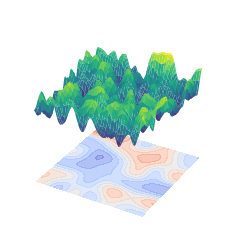

In [26]:
A = np.random.rand(20, 20)
B = np.random.rand(7, 7)
plot_vae_surface(array_top=A,array_bottom=B,file_name='plot_3D')

You can also define your own array to achieve specific effect you want.

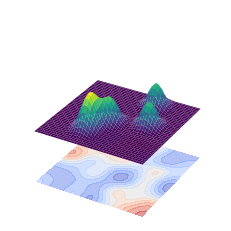

In [45]:
B = np.random.rand(7, 7)
A = np.zeros([10, 10])
A[5,7]=-1
A[8,6]=-1
A[4,4]=-1
A[2,3]=-1
A[3,3]=-1
plot_vae_surface(array_top=A,array_bottom=B,file_name='plot_3D')